# Data Wrangling
 

<h2>What is the purpose of data wrangling?</h2>


Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h4>Import pandas and required libraries</h4> 


In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import plotly
import plotly.express as px
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Reading the datasetand adding the related headers</h2>


Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".


In [2]:

df=pd.read_csv(r"C:\Users\neera\Desktop\imports-85.csv")


In [3]:
df.columns=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
# To see what the data set looks like, we'll use the head() method.
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.

<div>So, how do we identify all those missing values and deal with them?</div> 

<b>How to work with missing data?</b>

Steps for working with missing data:

<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>


<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>

<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert "?" to NaN</h4>
In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B.


In [6]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [7]:
missing_data = df.isnull()
missing_data.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.


In [8]:
missing_data.columns.values.tolist()

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>


In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    204
Name: symboling, dtype: int64

normalized-losses
False    164
True      40
Name: normalized-losses, dtype: int64

make
False    204
Name: make, dtype: int64

fuel-type
False    204
Name: fuel-type, dtype: int64

aspiration
False    204
Name: aspiration, dtype: int64

num-of-doors
False    202
True       2
Name: num-of-doors, dtype: int64

body-style
False    204
Name: body-style, dtype: int64

drive-wheels
False    204
Name: drive-wheels, dtype: int64

engine-location
False    204
Name: engine-location, dtype: int64

wheel-base
False    204
Name: wheel-base, dtype: int64

length
False    204
Name: length, dtype: int64

width
False    204
Name: width, dtype: int64

height
False    204
Name: height, dtype: int64

curb-weight
False    204
Name: curb-weight, dtype: int64

engine-type
False    204
Name: engine-type, dtype: int64

num-of-cylinders
False    204
Name: num-of-cylinders, dtype: int64

engine-size
False    204
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>


<h4>Calculate the mean value for the "normalized-losses" column </h4>


In [10]:
avg_norm_loss = df["normalized-losses"].astype("float").mean()
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


<h4>Replace "NaN" with mean value in "normalized-losses" column</h4>


In [11]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

<h4>Calculate the mean value for the "bore" column</h4>


In [12]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3290499999999996


<h4>Replace "NaN" with the mean value in the "bore" column</h4>


In [13]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

#### **Replace NaN in "stroke" column with the mean value.




In [14]:
# Write your code below and press Shift+Enter to execute 
avg_stroke=df['stroke'].astype('float').mean(axis=0)
df['stroke']=df['stroke'].replace(np.nan, avg_stroke, inplace=True)

<h4>Calculate the mean value for the "horsepower" column</h4>


In [15]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.22277227722772


<h4>Replace "NaN" with the mean value in the "horsepower" column</h4>


In [16]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

<h4>Calculate the mean value for "peak-rpm" column</h4>


In [17]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.990099009901


<h4>Replace "NaN" with the mean value in the "peak-rpm" column</h4>


In [18]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

To see which values are present in a particular column, we can use the ".value_counts()" method:


In [19]:
df['num-of-doors'].value_counts()

four    114
two      88
Name: num-of-doors, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [20]:
df['num-of-doors'].value_counts().idxmax()

'four'

The replacement procedure is very similar to what we have seen previously:


In [21]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Finally, let's drop all rows that do not have price data:


In [22]:
# simply drop whole row with NaN in "price" column
df.drop(df[df['symboling']==3].index, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [23]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,None,9.0,154,5000,19,26,16500
1,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,None,10.0,102,5500,24,30,13950
2,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,None,8.0,115,5500,18,22,17450
3,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,None,8.5,110,5500,19,25,15250
4,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,None,8.5,110,5500,19,25,17710


<b>Good!</b> Now, we have a dataset with no missing values.


<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


<h4>Let's list the data types for each column</h4>


In [24]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 


<h4>Convert data types to proper format</h4>


In [25]:
df[["bore", "stroke"]]=df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]]=df[["normalized-losses"]].astype("int")
df[["price"]]=df[["price"]].astype("float")
df[["peak-rpm"]]=df[["peak-rpm"]].astype("float")

<h4>Let us list the columns after the conversion</h4>


In [26]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>


<p>The formula for unit conversion is:<p>
L/100km = 235 / mpg
<p>We can do many mathematical operations directly in Pandas.</p>


In [27]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,NaN,9.0,154,5000.0,19,26,16500.0
1,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,NaN,10.0,102,5500.0,24,30,13950.0
2,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,NaN,8.0,115,5500.0,18,22,17450.0
3,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,NaN,8.5,110,5500.0,19,25,15250.0
4,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,NaN,8.5,110,5500.0,19,25,17710.0


In [28]:
# Convert mpg to L/100km 
df['city-mpg'] = 235/df["city-mpg"]


df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,NaN,9.0,154,5000.0,12.368421,26,16500.0
1,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,NaN,10.0,102,5500.0,9.791667,30,13950.0
2,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,NaN,8.0,115,5500.0,13.055556,22,17450.0
3,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,NaN,8.5,110,5500.0,12.368421,25,15250.0
4,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,NaN,8.5,110,5500.0,12.368421,25,17710.0


In [29]:
df.rename(columns={'symboling':'symbol'}, inplace=True)

In [30]:
df.head()

,symbol,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,NaN,9.0,154,5000.0,12.368421,26,16500.0
1,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,NaN,10.0,102,5500.0,9.791667,30,13950.0
2,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,NaN,8.0,115,5500.0,13.055556,22,17450.0
3,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,NaN,8.5,110,5500.0,12.368421,25,15250.0
4,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,NaN,8.5,110,5500.0,12.368421,25,17710.0


#### Transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".

In [31]:
# Write your code below and press Shift+Enter to execute 
df['highway-mpg']=235/df['highway-mpg']
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
df.head()

,symbol,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price
0,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,NaN,9.0,154,5000.0,12.368421,9.038462,16500.0
1,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,NaN,10.0,102,5500.0,9.791667,7.833333,13950.0
2,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,NaN,8.0,115,5500.0,13.055556,10.681818,17450.0
3,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,NaN,8.5,110,5500.0,12.368421,9.400000,15250.0
4,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,NaN,8.5,110,5500.0,12.368421,9.400000,17710.0


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>


In [32]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

#### Normalize the column "height".


In [33]:
# Write your code below and press Shift+Enter to execute 
df['height']=df['height']/df['height'].max()
df[["length","width","height"]].head()

,length,width,height
0,0.822681,0.905947,0.876254
1,0.848630,0.915629,0.908027
2,0.848630,0.918396,0.908027
3,0.851994,0.917012,0.887960
4,0.925997,0.987552,0.931438


<details><summary>Click here for the solution</summary>

```python
df['height'] = df['height']/df['height'].max() 

# show the scaled columns
df[["length","width","height"]].head()


```

</details>


Here we can see we've normalized "length", "width" and "height" in the range of \[0,1].


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


In [34]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

In [35]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

We set group  names:


In [36]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" to determine what each value of `df['horsepower']` belongs to.


In [37]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,154,Medium
1,102,Low
2,115,Low
3,110,Low
4,110,Low
5,110,Low
6,140,Medium
7,160,Medium
8,101,Low
9,101,Low


Let's see the number of vehicles in each bin:


In [38]:
hp=df["horsepower-binned"].value_counts().rename_axis('Horse Power').reset_index(name='Counts')
hp

,Horse Power,Counts
0,Low,152
1,Medium,24
2,High,2


Let's plot the distribution of each bin:


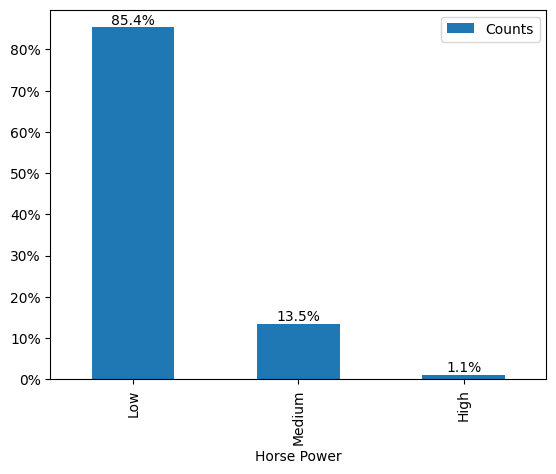

In [39]:
hp['Counts'] = hp['Counts'].apply(lambda x: (x/hp['Counts'].sum())*100)
labels = hp['Counts'].round(1).astype('str') + '%'
ax = hp.plot.bar(x='Horse Power', y='Counts', rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

<p>
    Look at the dataframe above carefully. You will find that the last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High"). 
</p>
<p>
    We successfully narrowed down the intervals from 59 to 3!
</p>


<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'horsepower bins')

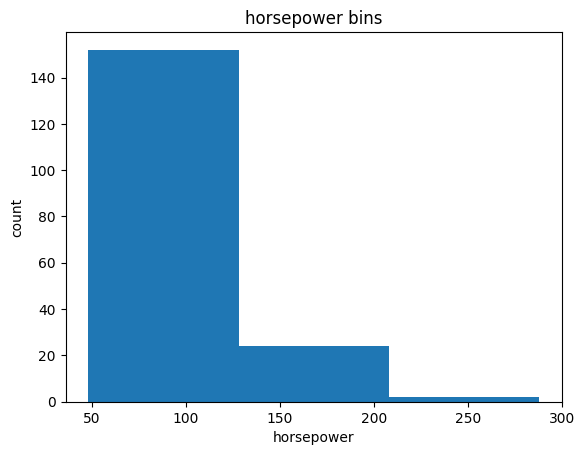

In [40]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

The plot above shows the binning result for the attribute "horsepower".


<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>


In [41]:
df.columns

Index(['symbol', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'horsepower-binned'],
      dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable\_1":


In [42]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Change the column names for clarity:


In [43]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In the dataframe, column 'fuel-type' has values for 'gas' and 'diesel' as 0s and 1s now.


In [44]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [45]:
df.head(10)

,symbol,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,NaN,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1
1,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,NaN,10.0,102,5500.0,9.791667,7.833333,13950.0,Low,0,1
2,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,NaN,8.0,115,5500.0,13.055556,10.681818,17450.0,Low,0,1
3,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,NaN,8.5,110,5500.0,12.368421,9.400000,15250.0,Low,0,1
4,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,NaN,8.5,110,5500.0,12.368421,9.400000,17710.0,Low,0,1
5,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,NaN,8.5,110,5500.0,12.368421,9.400000,18920.0,Low,0,1
6,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,NaN,8.3,140,5500.0,13.823529,11.750000,23875.0,Medium,0,1
7,0,122,audi,turbo,two,hatchback,4wd,front,99.5,0.856319,...,NaN,7.0,160,5500.0,14.687500,10.681818,NaN,Medium,0,1
8,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,NaN,8.8,101,5800.0,10.217391,8.103448,16430.0,Low,0,1
9,0,192,bmw,std,four,sedan,rwd,front,101.2,0.849592,...,NaN,8.8,101,5800.0,10.217391,8.103448,16925.0,Low,0,1


The last two columns are now the indicator variable representation of the fuel-type variable. They're all 0s and 1s now.


####  Create an indicator variable for the column "aspiration"


In [46]:
# Write your code below and press Shift+Enter to execute 
dummy_variable=pd.get_dummies(df["aspiration"])
dummy_variable.head(5)
dummy_variable.rename(columns={'std': 'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
df.head(5)

,symbol,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,NaN,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1
1,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,NaN,10.0,102,5500.0,9.791667,7.833333,13950.0,Low,0,1
2,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,NaN,8.0,115,5500.0,13.055556,10.681818,17450.0,Low,0,1
3,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,NaN,8.5,110,5500.0,12.368421,9.400000,15250.0,Low,0,1
4,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,NaN,8.5,110,5500.0,12.368421,9.400000,17710.0,Low,0,1


#### Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.


In [47]:
# Write your code below and press Shift+Enter to execute 
df = pd.concat([df, dummy_variable], axis=1)
df.drop('aspiration', axis = 1, inplace=True)


In [48]:
df.head()

,symbol,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
1,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
2,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0
3,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.917012,...,110,5500.0,12.368421,9.400000,15250.0,Low,0,1,1,0
4,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.987552,...,110,5500.0,12.368421,9.400000,17710.0,Low,0,1,1,0


In [49]:
df.to_csv(r"C:\Users\neera\Desktop\import-85-new.csv", index=False)